# Hypothesis test

The data set iData.csv containing information on births recorded in a particular state.

There are two tasks that we will do to illustrate the technique of the Hypothesis test.

a) It is claimed that mothers' smoking habit does not have any effect on the birth weight of the babies. To verity this claim, I need to construct a significance test by writing a null hypothesis, and an alternative hypothesis.



b) Conduct a hypothesis test evaluating whether the average weight gained is different from 30. 

In [1]:
# Load and have a look at the data sheet
MyData <- read.csv(file="iData.csv", header=TRUE, sep=",")

head(MyData)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
18,15,younger mom,37,full term,12,married,76,8.44,not low,male,nonsmoker,not white
17,15,younger mom,35,premie,5,married,15,4.69,low,male,nonsmoker,not white
20,16,younger mom,37,full term,13,married,52,6.94,not low,female,nonsmoker,white
30,16,younger mom,45,full term,9,married,28,7.44,not low,male,nonsmoker,white


For a),
We need to use t-test to compare the mean of two different groups (Somker V.S Nosmoker).

$
  \begin{cases}
    H_0: \mu_1 - \mu_2=0       & \quad \text{Null Hypothesis}\\
    H_A: \mu_1 - \mu_2 \neq 0   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

In H0 we believe that mothers' smoking habit does not have any effect on the birth weight of the babies

In Ha we think there is the effect on it

In [2]:
# Assign the subset into two variables
bw_nosmoker <- subset(MyData, habit == 'nonsmoker', select = c("weight"))
bw_smoker <- subset(MyData,habit=='smoker',select=c("weight"))
# Comparing means from two independent groups, use T-test here 
t.test(bw_nosmoker,bw_smoker)


	Welch Two Sample t-test

data:  bw_nosmoker and bw_smoker
t = 2.3625, df = 108.54, p-value = 0.01994
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.05801978 0.66264264
sample estimates:
mean of x mean of y 
 7.246760  6.886429 


Conclusion:
- The P-value = 0.01994, which is less than 0.05. So we reject the Null Hypothesis. We then suggest our Alternative Hypothesis

- 95 percent confidence interval: [0.05801978 0.66264264]

In b)Conduct a hypothesis test evaluating whether the average weight gained is different from 30

$
  \begin{cases}
    H_0: \mu=30       & \quad \text{Null Hypothesis}\\
    H_A: \mu \neq 30   & \quad \text{Alternative Hypothesis}\\
  \end{cases}
$

In [3]:
# We apply the t.test since there is a single mean with mu setted to 30.
t.test(MyData$gained, mu = 30)


	One Sample t-test

data:  MyData$gained
t = 1.5538, df = 799, p-value = 0.1206
alternative hypothesis: true mean is not equal to 30
95 percent confidence interval:
 29.7966 31.7484
sample estimates:
mean of x 
  30.7725 


Conclusion:
- The P-value is 0.1206, which is greater than 0.05. So we fail to reject the null hypothesis.
- The 95 percent confidence interval: [29.7966 31.7484]. Mean is 30.7725

# Rejection sampling

This example shows the rejection sampleing technique that can be apply to sample a complex distribution.
Given $p(x) =N(\mu=8, \sigma^2=4)+N(\mu=30, \sigma^2=25)$ that is a mixture of two Gaussian distributions. Implement the rejection sampling algorithm that samples data from $p(x)$.

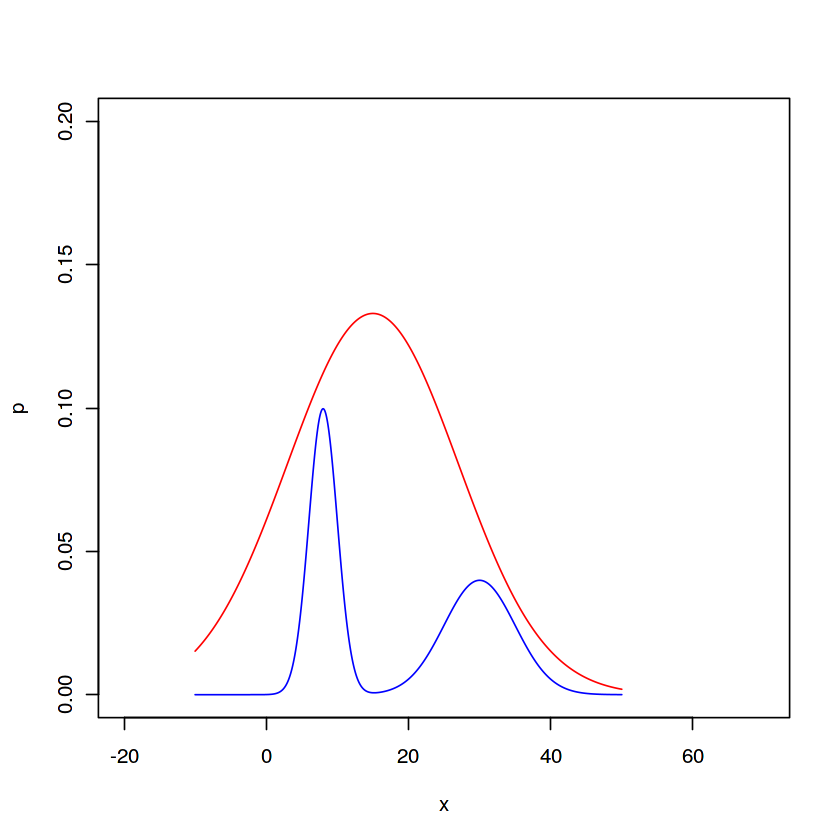

In [4]:
# We first draw the complex distribution
x=seq(-10,50,length=1000)
p=0.5*dnorm(x,mean=8, sd = 2) + 0.5*dnorm(x,mean=30,sd= 5)
plot(x,p,type="l",ylim=c(0,0.2),xlim=c(-20,70),col='blue')

c=4
q=c*dnorm(x,15,12)
lines(x,q,col='red')


# We can see that the density boundery,
# so we can propose the normal distribution q(x) with c=4 for our source distribution.
# q(x)=N(u=15,σ=12)

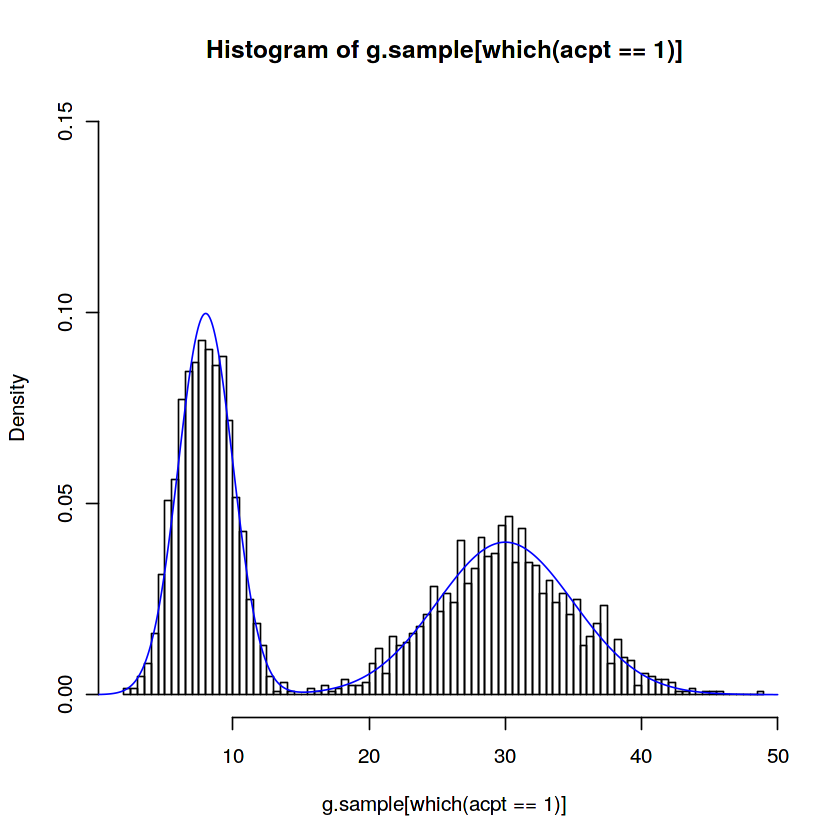

In [6]:
# Implement the rejection sampling algorithm to sample 10000 data from q(x) for x in [-10,50]
g.sample=rnorm(10000,15,12) # generate the sample
acpt=c() # initialize an accumulator for our accepted samples
 
for (i in 1:length(g.sample)){
u=runif(1,0,1) # uniform sample for deciding accept/reject
if(dnorm(g.sample[i],15,12)*c*u <= 0.5*dnorm(g.sample[i],8, sd = 2) + 0.5*dnorm(g.sample[i],30,sd= 5)) {acpt[i]=1}
else {acpt[i]=0}
}
 
hist(g.sample[which(acpt==1)],breaks=100,freq=FALSE,ylim=c(0,0.15))
lines(x,0.5*dnorm(x,mean=8, sd = 2) + 0.5*dnorm(x,mean=30,sd= 5),col='blue')